# Setup libraries

In [549]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%cd E:\OsAmA\2020\Deeplearning\Kaggle\HousePrices
print("Setup Complete")

E:\OsAmA\2020\Deeplearning\Kaggle\HousePrices
Setup Complete


# Importing the data

In [550]:
train_path = 'train.csv'
train = pd.read_csv(train_path)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [551]:
train.shape

(1460, 81)

In [552]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [553]:
test_path = 'test.csv'
test = pd.read_csv(test_path)
test_Id = test['Id'].values
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [554]:
test.shape

(1459, 80)

In [555]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# data processing

In [556]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [557]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Correlation matrix

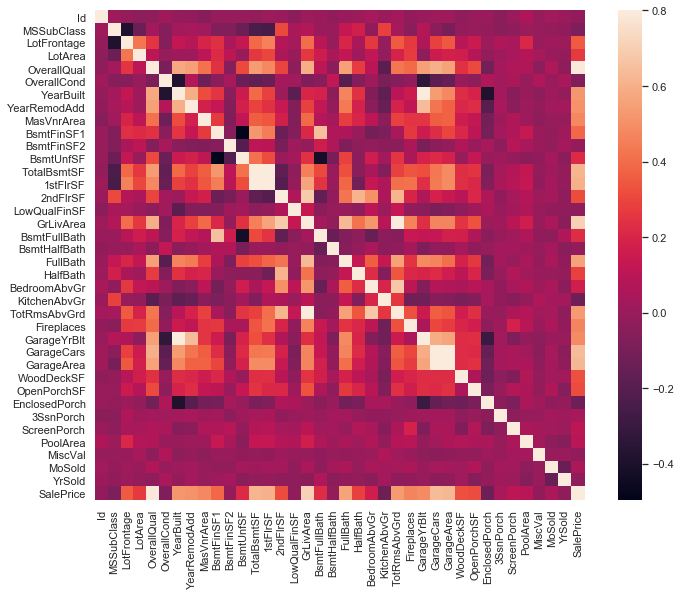

In [558]:
corr_mat = train.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat , square = True , vmax = 0.8 )

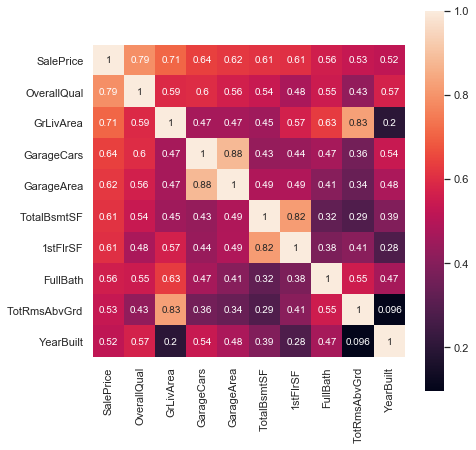

In [559]:
cols_10 = corr_mat.nlargest(10 , ['SalePrice'])['SalePrice'].index
corr_mat_10 = corr_mat[cols_10][cols_10].nlargest(10 , ['SalePrice'])
plt.subplots(figsize = (7 , 7))
sns.heatmap(corr_mat_10 , annot = True , square = True)

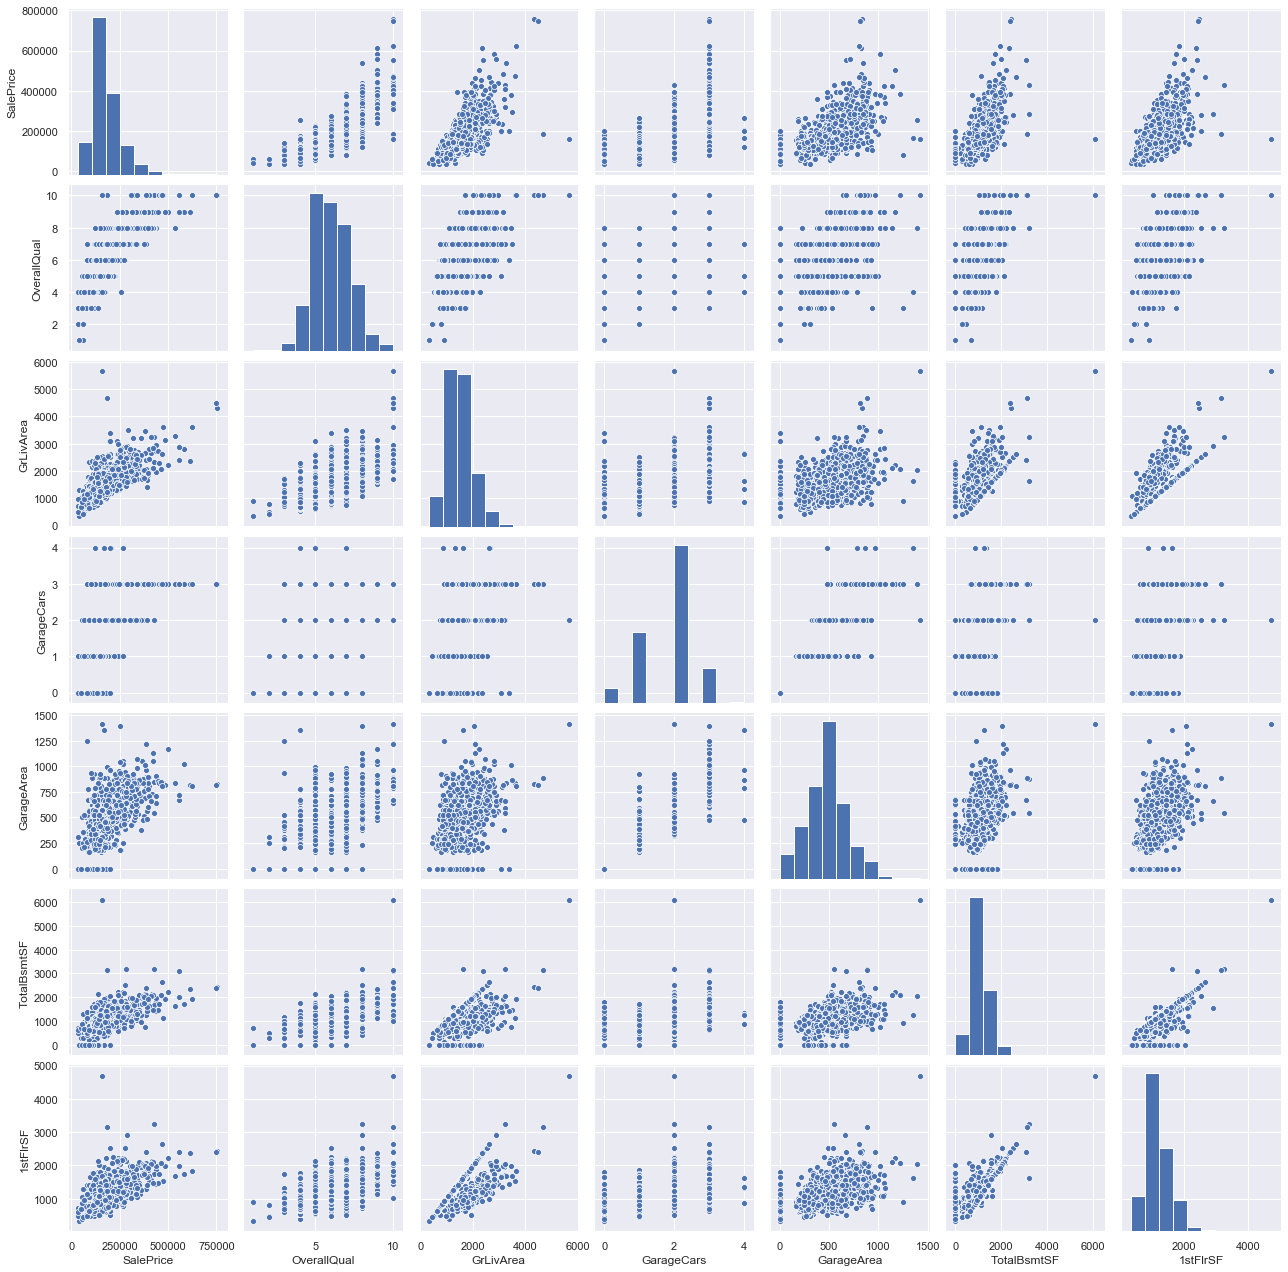

In [560]:
sns.set()
cols_7 = corr_mat_10.nlargest(7 , ['SalePrice'])['SalePrice'].index
mini_corr_mat = train[cols_7][cols_7]
sns.pairplot(mini_corr_mat ,  height = 2.5)

## removing Outliers

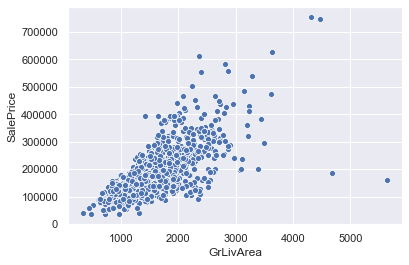

In [561]:
sns.scatterplot(x = train.GrLivArea , y = train.SalePrice)

In [562]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
y_train = train['SalePrice'].values

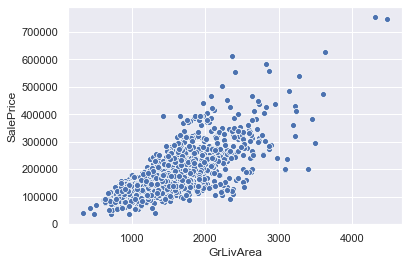

In [563]:
sns.scatterplot(x = train.GrLivArea , y = train.SalePrice)

## Missing Data

In [564]:
total_miss = train.isnull().sum().sort_values(ascending = False)
percent_miss = ((train.isnull().sum())/train.isnull().count()).sort_values(ascending = False)
missing = pd.concat([total_miss , percent_miss] , axis = 1 , keys = ['total' , 'percent'])
missing.head(20)

,total,percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageCond,81,0.055556
GarageType,81,0.055556
GarageYrBlt,81,0.055556
GarageFinish,81,0.055556


In [565]:
total_miss_t = test.isnull().sum().sort_values(ascending = False)
percent_miss_t = ((test.isnull().sum())/test.isnull().count()).sort_values(ascending = False)
missing_t = pd.concat([total_miss_t , percent_miss_t] , axis = 1 , keys = ['total' , 'percent'])
missing_t.head(34)

,total,percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [566]:
all_data = pd.concat([train , test] , ignore_index= True)
all_data = all_data.drop('SalePrice' , axis = 1)

In [567]:
all_data.shape

(2917, 80)

In [568]:
total_miss_t = all_data.isnull().sum().sort_values(ascending = False)
percent_miss_t = ((all_data.isnull().sum())/all_data.isnull().count()).sort_values(ascending = False)
missing_t = pd.concat([total_miss_t , percent_miss_t] , axis = 1 , keys = ['total' , 'percent'])
missing_t.head(34)

,total,percent
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageCond,159,0.054508
GarageQual,159,0.054508
GarageYrBlt,159,0.054508
GarageFinish,159,0.054508


In [569]:
#Pool column
all_data['PoolQC'] = all_data['PoolQC'].fillna('NoP')

In [570]:
#MiscFeature
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('NoF')

In [571]:
# Alley
all_data['Alley'] = all_data['Alley'].fillna('NoAll')

In [572]:
#Fence
all_data['Fence'] = all_data['Fence'].fillna('NoFen')

In [573]:
# FireplaceQu
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('NoFir')

In [574]:
# LotFrontage
all_data.LotFrontage.fillna(all_data.groupby('Neighborhood')['LotFrontage'].transform('median') , inplace = True)

In [575]:
# GarageCond , GarageQual ,  , GarageFinish , GarageType , GarageArea , GarageCars
gara_cat  = ['GarageCond' , 'GarageQual' , 'GarageFinish' , 'GarageType' ]
for col in gara_cat:
    all_data[col] = all_data[col].fillna('NoGar')

In [576]:
# GarageYrBlt , GarageArea , GarageCars
gara_num = ['GarageYrBlt' , 'GarageArea' , 'GarageCars']
for col in gara_num:
    all_data[col] = all_data[col].fillna(0)

In [577]:
# BsmtCond , TotalBsmtSF , BsmtUnfSF , BsmtFinSF2 , BsmtFinSF1 , BsmtFullBath , BsmtHalfBath , BsmtFinType1
# BsmtFinType2 , BsmtQual , BsmtExposure
Bsmt_cat = ['BsmtCond' , 'BsmtFinType1' , 'BsmtFinType2' , 'BsmtExposure' , 'BsmtQual']
for col in Bsmt_cat:
    all_data[col] = all_data[col].fillna('NoBsmt')

In [578]:
#  TotalBsmtSF , BsmtUnfSF , BsmtFinSF2 , BsmtFinSF1 , BsmtFullBath , BsmtHalfBath 
Bsmt_num = ['TotalBsmtSF' , 'BsmtUnfSF' , 'BsmtFinSF2' , 'BsmtFinSF1' , 'BsmtFullBath' , 'BsmtHalfBath']
for col in Bsmt_num:
    all_data[col] = all_data[col].fillna(0)

In [579]:
total_miss_t = all_data.isnull().sum().sort_values(ascending = False)
percent_miss_t = ((all_data.isnull().sum())/all_data.isnull().count()).sort_values(ascending = False)
missing_t = pd.concat([total_miss_t , percent_miss_t] , axis = 1 , keys = ['total' , 'percent'])
missing_t.head(11)

,total,percent
MasVnrType,24,0.008228
MasVnrArea,23,0.007885
MSZoning,4,0.001371
Functional,2,0.000686
Utilities,2,0.000686
SaleType,1,0.000343
Exterior1st,1,0.000343
Electrical,1,0.000343
KitchenQual,1,0.000343
Exterior2nd,1,0.000343


In [580]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('NoMasVnr')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

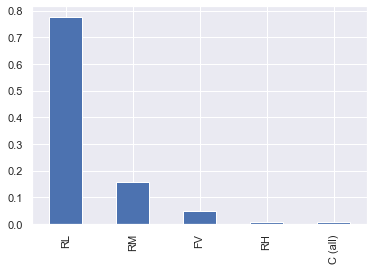

In [581]:
all_data.MSZoning.value_counts(normalize = True).plot(kind= 'bar' )

In [582]:
all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')

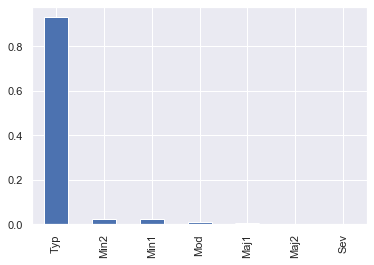

In [583]:
all_data.Functional.value_counts(normalize = True).plot(kind= 'bar' )

In [584]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

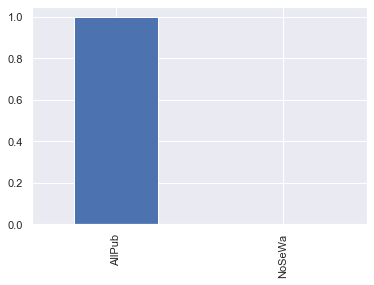

In [585]:
all_data.Utilities.value_counts(normalize = True).plot(kind= 'bar' )

In [586]:
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub')

In [587]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [588]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

In [589]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [590]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [591]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [592]:
cat_encod =  ['OverallQual' , 'OverallCond'  , 'ExterCond' , 'BsmtQual' , 'BsmtCond' , 
 'BsmtExposure' , 'BsmtFinType1' , 'BsmtFinType2' , 'HeatingQC' , 'KitchenQual' , 
 'FireplaceQu' , 'GarageFinish' , 'GarageQual' , 'GarageCond' , 'PoolQC' ] 

from sklearn.preprocessing import LabelEncoder

for col in cat_encod:
    encoder = LabelEncoder()
    all_data[col] = encoder.fit_transform(all_data[col])
    
all_data.shape

(2917, 80)

In [593]:
all_data.isnull().sum().max()

0

## Dummies

In [594]:
all_data = pd.get_dummies(all_data , drop_first= True)

In [595]:
train.shape

(1458, 81)

In [596]:
test.shape

(1459, 80)

In [597]:
all_data.shape

(2917, 217)

In [598]:
train = all_data[:train.shape[0]]
test = all_data[train.shape[0]:]

In [599]:
train.shape

(1458, 217)

In [600]:
test.shape

(1459, 217)

In [601]:
X_test = test.drop('Id' , axis = 1)
X_train = train.drop('Id' , axis = 1)
X_test.shape

(1459, 216)

# BackwardElimination

In [602]:
X_train.insert(0 , 'Ones' ,np.ones((X_train.shape[0] , 1)).astype(int) , True)
X_train.head()

,Ones,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,6,4,2003,2003,196.0,4,...,0,0,0,0,1,0,0,0,1,0
1,1,20,80.0,9600,5,7,1976,1976,0.0,4,...,0,0,0,0,1,0,0,0,1,0
2,1,60,68.0,11250,6,4,2001,2002,162.0,4,...,0,0,0,0,1,0,0,0,1,0
3,1,70,60.0,9550,6,4,1915,1970,0.0,4,...,0,0,0,0,1,0,0,0,0,0
4,1,60,84.0,14260,7,4,2000,2000,350.0,4,...,0,0,0,0,1,0,0,0,1,0


In [617]:
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y_train, x ).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = x.drop(x.columns[j] , axis = 1)
                  
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X_train.copy()
X_Modeled = backwardElimination(X_opt2, SL)

In [604]:
X_Modeled.shape

(1458, 76)

# Modeling

In [605]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [606]:
Kfold = KFold(n_splits=10 , shuffle= True , random_state= 0)

## SVR

In [607]:
regressor = SVR(kernel= 'rbf')
scores = cross_val_score(regressor , X_Modeled , y_train , cv= Kfold , scoring= 'neg_mean_squared_log_error')
print(scores)

[-0.18619473 -0.15644867 -0.1666411  -0.13348317 -0.16806838 -0.20369491
 -0.16494728 -0.12577235 -0.1532635  -0.14534994]


In [608]:
np.mean(scores)

-0.16038640219499856

## DecisionTreeRegressor

In [609]:
regressor = DecisionTreeRegressor(random_state = 0)
scores = cross_val_score(regressor , X_Modeled , y_train , cv= Kfold , scoring= 'neg_mean_squared_log_error')
print(scores)

[-0.05026164 -0.03708064 -0.04743869 -0.04571599 -0.05072726 -0.05077557
 -0.04832086 -0.04337542 -0.03260539 -0.03787861]


In [610]:
np.mean(scores)

-0.0444180074593559

## RandomForestRegressor

In [611]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
scores = cross_val_score(regressor , X_Modeled , y_train , cv= Kfold , scoring= 'neg_mean_squared_log_error')
print(scores)

[-0.02252492 -0.01366261 -0.02300797 -0.02374762 -0.0339773  -0.02652188
 -0.01525791 -0.0236659  -0.01533058 -0.01809702]


In [612]:
np.mean(scores)

-0.021579370772325586

## on test

In [613]:
test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1458,1461,20,80.0,11622,4,5,1961,1961,0.0,4,...,0,0,0,0,1,0,0,0,1,0
1459,1462,20,81.0,14267,5,5,1958,1958,108.0,4,...,0,0,0,0,1,0,0,0,1,0
1460,1463,60,74.0,13830,4,4,1997,1998,0.0,4,...,0,0,0,0,1,0,0,0,1,0
1461,1464,60,78.0,9978,5,5,1998,1998,20.0,4,...,0,0,0,0,1,0,0,0,1,0
1462,1465,120,43.0,5005,7,4,1992,1992,0.0,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2915,160,21.0,1936,3,6,1970,1970,0.0,4,...,0,0,0,0,1,0,0,0,1,0
2913,2916,160,21.0,1894,3,4,1970,1970,0.0,4,...,0,0,0,0,1,0,0,0,0,0
2914,2917,20,160.0,20000,4,6,1960,1996,0.0,4,...,0,0,0,0,1,0,0,0,0,0
2915,2918,85,62.0,10441,4,4,1992,1992,0.0,4,...,0,0,0,0,1,0,0,0,1,0


In [614]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_Modeled, y_train)
prediction= regressor.predict(test[X_Modeled.columns])

In [615]:
Submition = pd.DataFrame({'Id' : test['Id'] , 'SalePrice' : prediction})
Submition.to_csv('Submition.csv' , index = False)

In [616]:
Submition

,Id,SalePrice
1458,1461,130081.946667
1459,1462,155551.416667
1460,1463,153885.623333
1461,1464,178213.940000
1462,1465,196374.716667
...,...,...
2912,2915,82328.313333
2913,2916,84729.573333
2914,2917,173211.090000
2915,2918,115805.593333
